In [47]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [6]:
## Read the campaign data
df_campaign = pd.read_excel("PatientResponse.xlsx", sheet_name=0)

In [7]:
## Load the campaign response data
df_response = pd.read_excel("PatientResponse.xlsx", sheet_name=1)
df_response["n"] = 1

In [8]:
df_campaign.columns

Index(['CampaignID', 'Type', 'Month'], dtype='object')

In [9]:
df_response.columns

Index(['Patient', 'CampaignID', 'n'], dtype='object')

In [19]:
df[df['Patient'] == 2]

,CampaignID,Type,Month,Patient,n
93,9,Pamphlet,April,2,1
249,27,WhatsApp,October,2,1


In [11]:
df=pd.merge(df_campaign, df_response, on="CampaignID")

In [12]:
df.head()

,CampaignID,Type,Month,Patient,n
0,1,email,January,10,1
1,1,email,January,23,1
2,1,email,January,24,1
3,1,email,January,40,1
4,1,email,January,55,1


In [20]:
pivot_data = df.pivot_table(index=['Patient'], columns=['CampaignID'], values='n')

In [21]:
pivot_data = pivot_data.fillna(0).reset_index()

In [23]:
cols = pivot_data.columns[1:]

In [24]:
cols

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
      dtype='object', name='CampaignID')

## KMeans clustering

In [25]:
cluster = KMeans(n_clusters=5)

In [26]:
pivot_data['cluster'] = cluster.fit_predict(pivot_data[pivot_data.columns[2:]])

In [27]:
pivot_data.head()

CampaignID,Patient,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,cluster
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3


#### Principal Component Analysis (PCA)

In [28]:
pca = PCA(n_components=2)

In [29]:
pivot_data['x'] = pca.fit_transform(pivot_data[cols])[:,0]
pivot_data['y'] = pca.fit_transform(pivot_data[cols])[:,1]

In [30]:
pivot_data.head()

CampaignID,Patient,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,cluster,x,y
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0.975682,0.177733
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,-0.307802,0.071641
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,-0.416673,0.992914
3,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3,0.547440,-0.609382
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,-0.379452,-0.753825


### Clusters

In [31]:
df_patient_clusters = pivot_data[['Patient', 'cluster', 'x', 'y']]

In [54]:
final_df = pd.merge(df_response, df_patient_clusters)
final_df = pd.merge(df_campaign, final_df)
final_df.head()

,CampaignID,Type,Month,Patient,n,cluster,x,y
0,1,email,January,10,1,0,-0.282221,-0.622973
1,1,email,January,23,1,3,-0.496037,-0.715865
2,1,email,January,24,1,2,-1.073771,0.126451
3,1,email,January,40,1,0,-0.856150,-0.289071
4,1,email,January,55,1,0,-0.357379,0.375035


In [45]:
cluster_0 = df_patient_clusters[df_patient_clusters['cluster'] == 0][['x', 'y']]
cluster_1 = df_patient_clusters[df_patient_clusters['cluster'] == 1][['x', 'y']]
cluster_2 = df_patient_clusters[df_patient_clusters['cluster'] == 2][['x', 'y']]
cluster_3 = df_patient_clusters[df_patient_clusters['cluster'] == 3][['x', 'y']]
cluster_4 = df_patient_clusters[df_patient_clusters['cluster'] == 4][['x', 'y']]

In [46]:
cluster_4

CampaignID,x,y
15,-0.433448,-0.020029
25,-0.449028,0.029626
77,-1.089406,-0.261836
78,-1.359682,-0.176954
85,-0.869976,-0.023688


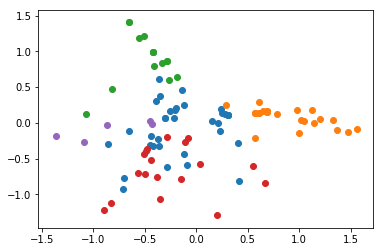

In [52]:
plt.scatter(x='x',y='y', data=cluster_0)
plt.scatter(x='x',y='y', data=cluster_1)
plt.scatter(x='x',y='y', data=cluster_2)
plt.scatter(x='x',y='y', data=cluster_3)
plt.scatter(x='x',y='y', data=cluster_4)

In [76]:
final_df.groupby('cluster').count()['n']

cluster
0    96
1    70
2    43
3    80
4    35
Name: n, dtype: int64

In [84]:
final_df.groupby('Type').count()['n']

Type
Long letter     32
Pamphlet        15
SMS             57
Telephone       43
WhatsApp       101
email           76
Name: n, dtype: int64

### Most effective campaign by group

In [95]:
result_groups = final_df.groupby('cluster')['Type'].value_counts()

In [96]:
result_groups

cluster  Type       
0        WhatsApp       38
         Telephone      16
         SMS            14
         Long letter    11
         email          11
         Pamphlet        6
1        SMS            37
         email          14
         Telephone      11
         WhatsApp        7
         Long letter     1
2        email          36
         Pamphlet        3
         WhatsApp        3
         Telephone       1
3        WhatsApp       41
         Telephone      14
         Long letter     8
         email           8
         SMS             6
         Pamphlet        3
4        Long letter    12
         WhatsApp       12
         email           7
         Pamphlet        3
         Telephone       1
Name: Type, dtype: int64

### Send WhatsApp campaign to this group

In [90]:
result_groups[0]

Type
WhatsApp       38
Telephone      16
SMS            14
Long letter    11
email          11
Pamphlet        6
Name: Type, dtype: int64

### List of patient IDs to target for the first group, for example

In [101]:
list_of_patients = final_df[final_df['cluster']==0]['Patient']
list_of_patients.head()

0     10
3     40
4     55
11    40
12    55
Name: Patient, dtype: int64

### Send SMS messages to this group

In [102]:
result_groups[1]

Type
SMS            37
email          14
Telephone      11
WhatsApp        7
Long letter     1
Name: Type, dtype: int64

### We can also see that this group hasn't responded to SMS, which is a very popupar campaign type for group 1

In [103]:
result_groups[2]

Type
email        36
Pamphlet      3
WhatsApp      3
Telephone     1
Name: Type, dtype: int64

### And so on.. 